In [16]:
.libPaths()

[1] "/root/miniconda3/envs/Rdoc/lib/R/library"

In [17]:
library(monocle)

In [18]:
setwd('/import/DB/zhang//data')
sce = readRDS('OS.final.rds')

In [4]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject



In [5]:
bb = sce 

In [19]:
library(dplyr)
library(RColorBrewer)
Idents(bb) = 'celltype'
DefaultAssay(bb) ='RNA'
data <- as(as.matrix(bb@assays$RNA@counts), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = bb@meta.data)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
fd <- new('AnnotatedDataFrame', data = fData)
#Construct monocle cds
monocds <- newCellDataSet(data,
                              phenoData = pd,
                              featureData = fd,
                              lowerDetectionLimit = 0.5,
                              expressionFamily = negbinomial.size())

print("format data done , filter select genes ")
#pData(monocds)$Cluster<-as.factor(pData(monocds)$celltype) 
pData(monocds)['Cluster']=bb@active.ident	
monocds <- estimateSizeFactors(monocds)
monocds <- estimateDispersions(monocds)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 4.0 GiB"


[1] "format data done , filter select genes "


Removing 622 outliers

Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
W

In [20]:
cds = monocds

In [21]:
outdaa = sce

In [22]:
sce

An object of class Seurat 
22452 features across 19544 samples within 1 assay 
Active assay: RNA (22452 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, umap, tsne

In [23]:
disp_table <- dispersionTable(cds)
disp.genes <- subset(disp_table, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id
cds <- setOrderingFilter(cds, disp.genes)

In [29]:
# var.genes <- VariableFeatures(outdaa)
# cds <- setOrderingFilter(cds, var.genes)

In [30]:
# DefaultAssay(outdaa) = 'RNA'
# Idents(outdaa) = 'seurat_clusters'
# deg.cluster <- FindAllMarkers(outdaa)
# diff.genes <- subset(deg.cluster,p_val_adj<0.05)$gene
# cds <- setOrderingFilter(cds, diff.genes)

In [31]:
# disp_table <- dispersionTable(cds)
# disp.genes <- subset(disp_table, mean_expression >= 0.1 & dispersion_empirical >= 1 * dispersion_fit)$gene_id

In [ ]:
# cds <- detectGenes(cds, min_expr = 0.1)

# print(head(fData(cds)))
# expressed_genes <- row.names(subset(fData(cds), num_cells_expressed >= 50)) # nolint
# cds <- cds[expressed_genes, ]

# disp_table <- dispersionTable(cds)
# unsup_clustering_genes <- subset(
# disp_table, mean_expression >= 0.05 &
#   dispersion_empirical >= 2 * dispersion_fit
# ) #

# cds <- setOrderingFilter(cds, unsup_clustering_genes$gene_id)

### 修改形状的参数 链接 https://cloud.tencent.com/developer/article/2056834

Warning message in scale_y_log10():
"log-10 transformation introduced infinite values."


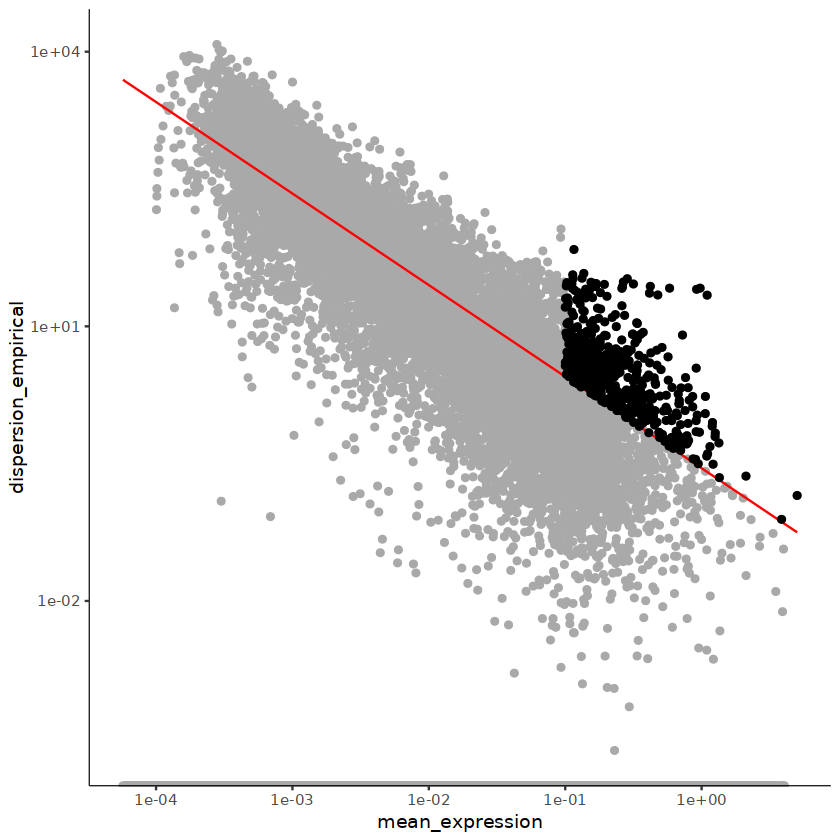

In [24]:
plot_ordering_genes(cds) 

In [25]:
cds <- reduceDimension(cds, max_components = 2, residualModelFormulaStr = "~sample", #去除样本影响
                       verbose = F, 
                       reduction_method = 'DDRTree')   # 修改method 为 reduction_method
cds <- orderCells(cds)

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"
Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
"Argument `neimode' is deprecated; use `mode' instead"


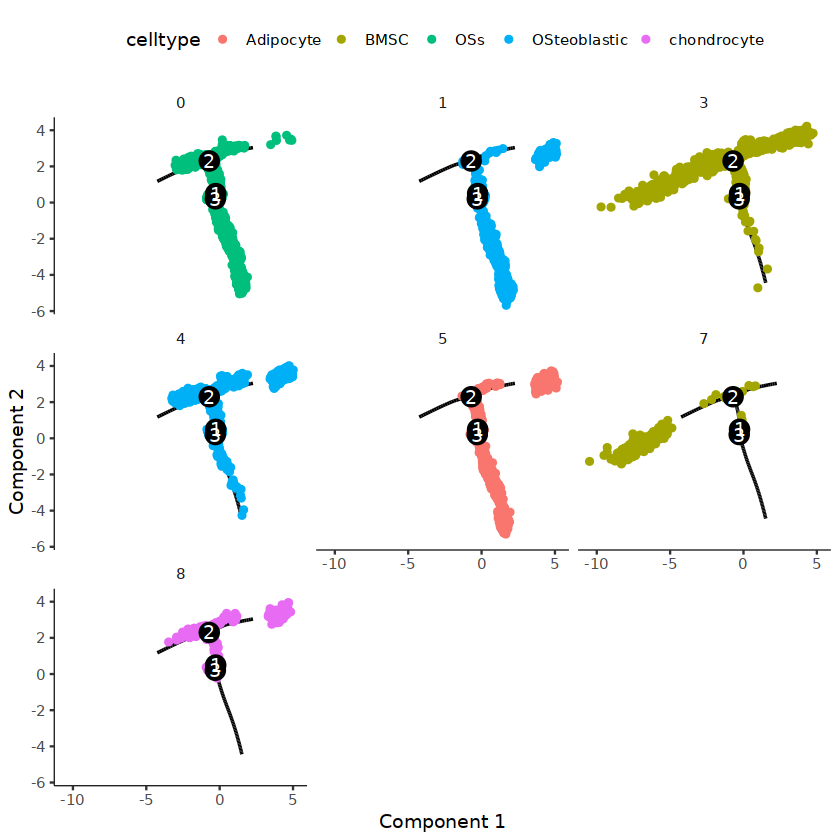

In [27]:
plot_cell_trajectory(cds, color_by = "celltype")+
  facet_wrap(~seurat_clusters, nrow = 3)